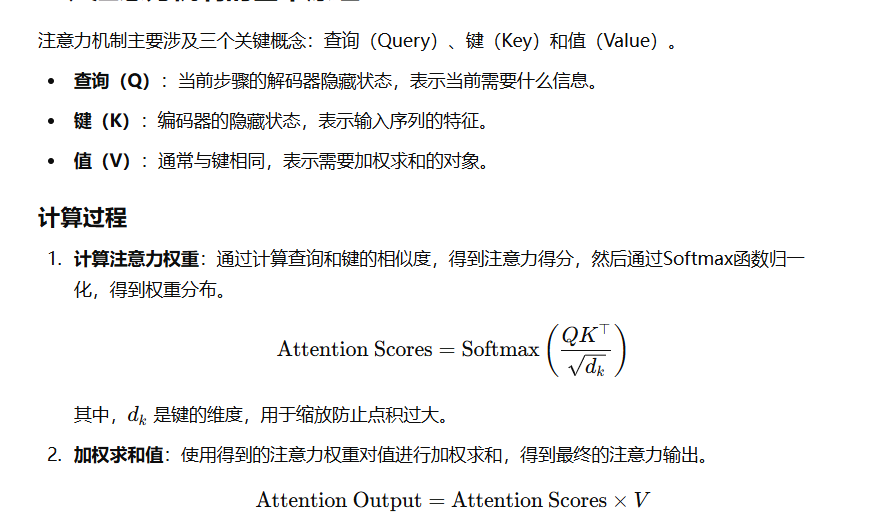

In [1]:
import torch
import torch.nn.functional as F

# 定义查询、键和值
# 假设batch_size=1，sequence_length=3，embedding_dim=4
Q = torch.tensor([[[1, 0, 0, 0]]], dtype=torch.float32)  # (1, 1, 4)
K = torch.tensor([[[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0]]], dtype=torch.float32)  # (1, 3, 4)
V = torch.tensor([[[1, 1],
                   [2, 2],
                   [3, 3]]], dtype=torch.float32)         # (1, 3, 2)

# 计算点积注意力
# Step 1: 计算Q和K的点积
scores = torch.matmul(Q, K.transpose(-2, -1))  # (1, 1, 3)

# Step 2: 缩放
d_k = K.size(-1)
scores = scores / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))

# Step 3: 计算注意力权重
attn_weights = F.softmax(scores, dim=-1)  # (1, 1, 3)

# Step 4: 加权求和得到输出
output = torch.matmul(attn_weights, V)  # (1, 1, 2)

print("Attention Weights:", attn_weights)
print("Attention Output:", output)


Attention Weights: tensor([[[0.4519, 0.2741, 0.2741]]])
Attention Output: tensor([[[1.8222, 1.8222]]])
